# 1.Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

# 2.Variables

## 2.1. Filenames

In [3]:
# National emissions reported to the Convention on Long-range Transboundary Air Pollution (LRTAP Convention), 2023
# https://sdi.eea.europa.eu/catalogue/srv/eng/catalog.search#/metadata/2999364f-be52-4012-b4fd-f98e2cc8fab6
ds_LRTAPemissions='01.Data/eea_t_lrtap-convention_p_1990-2021_v01_r00/CLRTAP_NVFR19_V23_1_GF_csv.csv'

## 2.2. Analysis parameters

In [4]:
# European 27 Countries
countryEU27 = ['BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE']

# 3.Load data

In [5]:
df_LRTAPemissions=pd.read_csv(ds_LRTAPemissions,header=0,delimiter="\t", dtype='unicode')

# 4. Exploratory data analysis (EDA)

## 4.1. EDA general

### 4.1.1. Data preview (head)

In [6]:
df_LRTAPemissions.head()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
0,AT,Austria,As,NFR 2014-1,1A1a,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Public electricity and heat production
1,AT,Austria,As,NFR 2014-1,1A1b,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Petroleum refining
2,AT,Austria,As,NFR 2014-1,1A1c,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Manufacture of solid fuels and other energy in...
3,AT,Austria,As,NFR 2014-1,1A2a,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Stationary combustion in manufacturing industr...
4,AT,Austria,As,NFR 2014-1,1A2b,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Stationary combustion in manufacturing industr...


### 4.1.2. Data preview (tail)

In [7]:
df_LRTAPemissions.tail()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
3933691,EEA32,EEA32,PCB,NEC NFR-1 sector classification,5E,2009,80.94100949939022,kg,NaN,NaN,NaN,NaN
3933692,EEA32,EEA32,total PAH,NEC NFR-1 sector classification,5C1bv,2011,0.0009683435030517829,Mg,NaN,NaN,NaN,NaN
3933693,EEA32,EEA32,Zn,NEC NFR-1 sector classification,3B4a,2009,0,Mg,NaN,NaN,NaN,NaN
3933694,EEA32,EEA32,HCB,NEC NFR-1 sector classification,1A2f,2002,1.0821639623803498,kg,NaN,NaN,NaN,NaN
3933695,EEA32,EEA32,Hg,NEC NFR-1 sector classification,2A5a,2010,0.0002,Mg,NaN,NaN,NaN,NaN


### 4.1.3. Shape of dataset

In [8]:
df_LRTAPemissions.shape

(3933696, 12)

### 4.1.4. Data types

In [9]:
df_LRTAPemissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933696 entries, 0 to 3933695
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Country_Code        object
 1   Country             object
 2   Pollutant_name      object
 3   Format_name         object
 4   Sector_code         object
 5   Year                object
 6   Emissions           object
 7   Unit                object
 8   Notation            object
 9   VersionId           object
 10  Parent_sector_code  object
 11  Sector_name         object
dtypes: object(12)
memory usage: 360.1+ MB


### 4.1.5. Data conversions

We can see that the columns `Year` and `Emissions` has `object` data type, let's correct them.

In [10]:
df_LRTAPemissions['Emissions'] = df_LRTAPemissions['Emissions'].astype("float")
df_LRTAPemissions['Year'] = df_LRTAPemissions['Year'].astype("int")

In [11]:
df_LRTAPemissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933696 entries, 0 to 3933695
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Country_Code        object 
 1   Country             object 
 2   Pollutant_name      object 
 3   Format_name         object 
 4   Sector_code         object 
 5   Year                int64  
 6   Emissions           float64
 7   Unit                object 
 8   Notation            object 
 9   VersionId           object 
 10  Parent_sector_code  object 
 11  Sector_name         object 
dtypes: float64(1), int64(1), object(10)
memory usage: 360.1+ MB


## 4.2. EDA dimensions

### 4.2.1. Year

In [12]:
# Describe used with lambda functions to prevent exponential notation
df_LRTAPemissions['Year'].describe().apply(lambda x: format(x, 'f'))

count    3933696.000000
mean        2005.500000
std            9.233094
min         1990.000000
25%         1997.750000
50%         2005.500000
75%         2013.250000
max         2021.000000
Name: Year, dtype: object

In [13]:
df_LRTAPemissions.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [14]:
df_LRTAPemissions.Year.nunique()

32

### 4.2.2. Country_code

In [15]:
df_LRTAPemissions.Country_Code.unique()

array(['AT', 'BE', 'DK', 'FI', 'FR', 'DE', 'GR', 'IE', 'IT', 'LU', 'NL',
       'PT', 'ES', 'SE', 'BG', 'HR', 'CY', 'CZ', 'EE', 'HU', 'LT', 'LV',
       'MT', 'PL', 'RO', 'SI', 'SK', 'EU27', 'CH', 'IS', 'LI', 'NO', 'TR',
       'EEA32'], dtype=object)

In [16]:
df_LRTAPemissions.Country_Code.nunique()

34

### 4.2.3. Country

In [17]:
df_LRTAPemissions.Country.unique()

array(['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
       'Portugal', 'Spain', 'Sweden', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Estonia', 'Hungary', 'Lithuania', 'Latvia', 'Malta',
       'Poland', 'Romania', 'Slovenia', 'Slovakia', 'EU27', 'Switzerland',
       'Iceland', 'Liechtenstein', 'Norway', 'Türkiye', 'Czech Republic',
       'EEA32'], dtype=object)

In [18]:
df_LRTAPemissions.Country.nunique()

35

In [19]:
q = """SELECT Country_Code, COUNT(DISTINCT Country) FROM df_LRTAPemissions GROUP BY Country_Code HAVING COUNT(DISTINCT Country)>1;"""
pysqldf = lambda q: sqldf(q, globals())
df_duplicateCC = pysqldf(q)

In [20]:
df_duplicateCC

,Country_Code,COUNT(DISTINCT Country)
0,CZ,2


In [21]:
q = """SELECT DISTINCT Country_Code, Country FROM df_LRTAPemissions WHERE Country_Code='CZ';"""
pysqldf = lambda q: sqldf(q, globals())
df_uniqueCC = pysqldf(q)

In [22]:
df_uniqueCC

,Country_Code,Country
0,CZ,Czechia
1,CZ,Czech Republic


### 4.2.4. Pollutant name

In [23]:
df_LRTAPemissions.Pollutant_name.unique()

array(['As', 'BC', 'benzo(a)', 'benzo(b)', 'benzo(k)', 'Cd', 'CO', 'Cr',
       'Cu', 'dioxin', 'HCB', 'Hg', 'Indeno', 'NH3', 'Ni', 'NMVOC', 'NOx',
       'Pb', 'PCB', 'PM10', 'PM2.5', 'Se', 'SOx', 'total PAH', 'TSP',
       'Zn'], dtype=object)

In [24]:
df_LRTAPemissions.Pollutant_name.nunique()

26

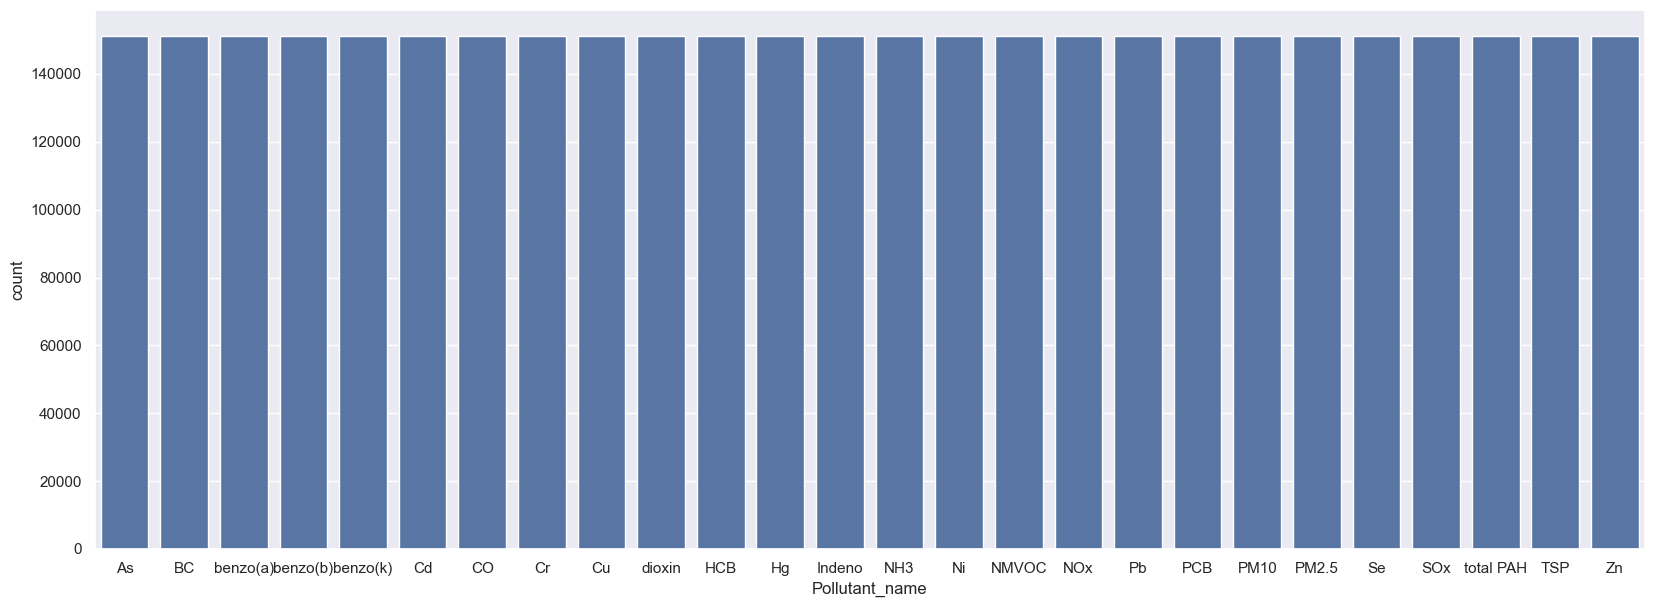

In [25]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(x='Pollutant_name', data=df_LRTAPemissions);

### 4.2.5. Version

In [26]:
df_LRTAPemissions.VersionId.unique()

array(['1', nan], dtype=object)

In [27]:
df_LRTAPemissions.VersionId.nunique()

1

### 4.2.6. Unit

In [28]:
q = """SELECT Pollutant_name, COUNT(DISTINCT Unit) FROM df_LRTAPemissions GROUP BY Pollutant_name HAVING COUNT(DISTINCT Unit)>1;"""
pysqldf = lambda q: sqldf(q, globals())
df_duplicateUNIT = pysqldf(q)

In [29]:
df_duplicateUNIT

,Pollutant_name,COUNT(DISTINCT Unit)


There are not any `Pollutant_name` which is listed with more than one `Unit`.

### 4.2.7. Notation

In [30]:
df_LRTAPemissions.Notation.unique()

array([nan], dtype=object)

In [31]:
df_LRTAPemissions.Notation.nunique()

0

## 4.3. EDA measures

### 4.3.1. Emissions

In [32]:
# Describe used with lambda functions to prevent exponential notation
df_LRTAPemissions['Emissions'].describe().apply(lambda x: format(x, 'f'))

count    2419559.000000
mean           9.293554
std          257.592859
min            0.000000
25%            0.000000
50%            0.000000
75%            0.031999
max        60480.189090
Name: Emissions, dtype: object

# 5. Perimeter of analysis

## 5.1. Sectors of interest

Let's filter only emissions from domestic and international aviation.

In [33]:
# List sectors of interest which include 'aviation' in their name
col=df_LRTAPemissions.Sector_name.unique()
for i in col: 
    if type(i) is str:
        if 'aviation' in i:
            print(i)

International aviation LTO (civil)
Domestic aviation LTO (civil)
International aviation cruise (civil)
Domestic aviation cruise (civil)


In [34]:
# Define the sectors of interest
sectors_of_interest = [
    'International aviation LTO (civil)',
    'Domestic aviation LTO (civil)',
    'International aviation cruise (civil)',
    'Domestic aviation cruise (civil)'
]

# Filter the DataFrame for these sectors
df_emissions = df_LRTAPemissions[df_LRTAPemissions['Sector_name'].isin(sectors_of_interest)]

In [35]:
df_emissions.Sector_name.unique()

array(['International aviation LTO (civil)',
       'Domestic aviation LTO (civil)',
       'International aviation cruise (civil)',
       'Domestic aviation cruise (civil)'], dtype=object)

## 5.2. Country code

In [36]:
# Filter the DataFrame for these sectors
df_emissions = df_emissions[(df_emissions.Country_Code == 'EU27')]


In [37]:
df_emissions.Country_Code.unique()

array(['EU27'], dtype=object)

In [38]:
df_emissions.Country_Code.nunique()

1

# 6. Management of Nan values

## 6.1. Analysis of Nan values

### 6.1.1. Nan values by Pollutant name

In [39]:
df_Nan_Pollutant = df_emissions.groupby(['Pollutant_name']).agg({'Emissions': lambda x: x.isnull().sum()})
df_Nan_Pollutant

,Emissions
Pollutant_name,
As,0
BC,0
CO,0
Cd,0
Cr,0
Cu,0
HCB,128
Hg,0
Indeno,0


In [40]:
df_Nan_Pollutant['Emissions'].sum()

197

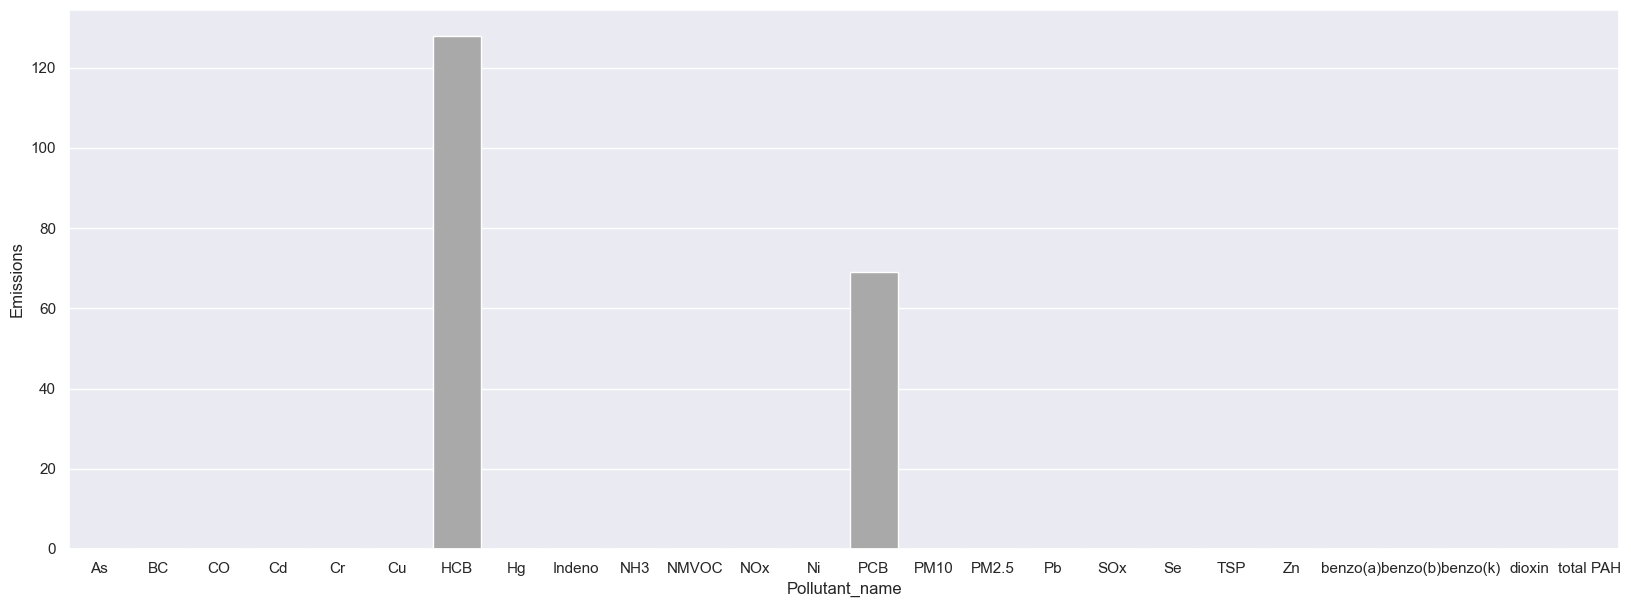

In [41]:
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x='Pollutant_name', y='Emissions', data=df_Nan_Pollutant, color='darkgray');

### 6.1.2. Handle of rows with Nan emissions of `HCB`

As we don't have any information regarding the emissions of HCB from any year and any sector, we can't apply any strategy fo till the Nan values, just get rid of these rows.

In [42]:
df_emissions = df_emissions[~(df_emissions.Pollutant_name == 'HCB')]

### 6.1.3. Handle of rows with Nan emissions of `PCB`

In [43]:
df_emissionsPCB = df_emissions[(df_emissions.Pollutant_name == 'PCB')]

In [44]:
df_emissionsPCB.groupby(['Sector_name']).size()

Sector_name
Domestic aviation LTO (civil)            32
Domestic aviation cruise (civil)         32
International aviation LTO (civil)       32
International aviation cruise (civil)    32
dtype: int64

In [45]:
df_emissionsPCB.groupby(['Sector_name']).agg({'Emissions': lambda x: x.isnull().sum()})

,Emissions
Sector_name,
Domestic aviation LTO (civil),0
Domestic aviation cruise (civil),32
International aviation LTO (civil),5
International aviation cruise (civil),32


For `Domestic aviation cruise (civil)` and `International aviation cruise (civil)	` we don't have any information so we can't fill the rows with Nan values, we proceed with the analysis of only `nternational aviation LTO (civil)	` rows.

In [46]:
df_emissionsPCB_LTO = df_emissionsPCB[(df_emissionsPCB.Sector_name == 'International aviation LTO (civil)')]

In [47]:
df_emissionsPCB_LTO.tail()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
2750960,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2017,NaN,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2754852,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2018,NaN,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2758744,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2019,NaN,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2762636,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2020,NaN,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2766528,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2021,NaN,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)


In [48]:
df_emissionsPCB_LTO = df_emissionsPCB_LTO.ffill()

In [49]:
df_emissionsPCB_LTO.tail()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
2750960,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2017,1.343840e-09,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2754852,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2018,1.343840e-09,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2758744,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2019,1.343840e-09,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2762636,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2020,1.343840e-09,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
2766528,EU27,EU27,PCB,NFR 2014-1,1A3ai(i),2021,1.343840e-09,kg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)


In [50]:
# Delete rows from Pollutant_name == 'PCB' AND Sector_name == 'International aviation LTO (civil)'
df_emissions = df_emissions[~((df_emissions.Pollutant_name == 'PCB') & (df_emissionsPCB.Sector_name == 'International aviation LTO (civil)'))]

In [51]:
# Add df_emissionsPCB_LTO to df_emissions
df_emissions = pd.concat([df_emissions, df_emissionsPCB_LTO], axis=0)

In [52]:
df_emissionsPCB = df_emissions[(df_emissions.Pollutant_name == 'PCB')]
df_emissionsPCB.groupby(['Sector_name']).agg({'Emissions': lambda x: x.isnull().sum()})

,Emissions
Sector_name,
Domestic aviation LTO (civil),0
Domestic aviation cruise (civil),32
International aviation LTO (civil),0
International aviation cruise (civil),32


# 7. Aggregation

## 7.1. Pivot of data

In [53]:
def transform_df(df):
    # Group by Year and Pollutant_name, then sum the Emissions
    grouped = df.groupby(['Year', 'Pollutant_name'])['Emissions'].sum()

    # Pivot the table
    pivoted_df = grouped.unstack(level='Pollutant_name')

    # Reset index to make 'Year' a column
    pivoted_df.reset_index(inplace=True)

    return pivoted_df

In [54]:
# Use the function on your DataFrame
df_emissionsPV = transform_df(df_emissions)

In [55]:
df_emissionsPV

Pollutant_name,Year,As,BC,CO,Cd,Cr,Cu,Hg,Indeno,NH3,...,Pb,SOx,Se,TSP,Zn,benzo(a),benzo(b),benzo(k),dioxin,total PAH
0,1990,0.001071,2.298696,514.841454,0.003707,0.044906,0.137487,0.013896,0.016692,0.772263,...,209.058106,16.553998,0.030697,4.572956,1.243983,0.014689,0.107589,0.012862,0.021469,0.152477
1,1991,0.000896,2.193775,453.177145,0.003175,0.044566,0.136758,0.013338,0.008351,0.757485,...,109.642519,16.188352,0.030934,4.497849,0.947406,0.003604,0.022360,0.002975,0.012369,0.037938
2,1992,0.000853,2.215153,518.329998,0.003330,0.048017,0.146645,0.013321,0.008160,0.816351,...,99.187053,17.317928,0.033444,4.586130,0.937106,0.002921,0.017951,0.002398,0.011752,0.032137
3,1993,0.001054,2.199278,620.187543,0.003154,0.049412,0.164067,0.013583,0.010088,0.859435,...,77.374328,17.960344,0.035330,4.637420,1.110626,0.005540,0.039312,0.004756,0.014064,0.060423
4,1994,0.001050,2.223296,535.043975,0.003470,0.052866,0.174008,0.013986,0.012146,0.893203,...,70.425151,18.577065,0.036410,4.796721,1.155347,0.008032,0.060295,0.007042,0.016279,0.088264
5,1995,0.001060,2.279197,524.703774,0.003735,0.056727,0.186442,0.014675,0.012302,0.926264,...,60.947579,19.382708,0.039685,5.005602,1.174641,0.007552,0.056679,0.006616,0.015750,0.083961
6,1996,0.001044,2.317858,404.053229,0.003526,0.058998,0.201223,0.014830,0.013508,0.970630,...,61.682609,20.681113,0.043178,5.195250,1.090056,0.008138,0.060498,0.007106,0.015548,0.090145
7,1997,0.001154,2.367841,355.110231,0.003874,0.063733,0.216323,0.015933,0.013515,1.007361,...,59.992619,21.543001,0.046150,5.379016,1.230081,0.007500,0.055069,0.006517,0.015617,0.083558
8,1998,0.001214,2.448678,330.273810,0.004326,0.068062,0.225492,0.017052,0.014408,1.036446,...,57.315598,22.640648,0.050111,5.639982,1.330810,0.008050,0.059410,0.007016,0.015752,0.089926
9,1999,0.001362,2.553969,305.733224,0.004466,0.073160,0.241646,0.018656,0.014842,1.112070,...,64.107013,24.430146,0.056667,5.968153,1.433448,0.007726,0.057018,0.006745,0.014622,0.087512


## 7.2. Calculating moving average

In [56]:
pollutants = []

# Iterate over column names
for column in df_emissionsPV:
    if column != 'Year':
        df_emissionsPV['rolling_'+column] = df_emissionsPV[column].rolling(5).mean()
        pollutants.append(column)

In [57]:
df_emissionsPV

Pollutant_name,Year,As,BC,CO,Cd,Cr,Cu,Hg,Indeno,NH3,...,rolling_Pb,rolling_SOx,rolling_Se,rolling_TSP,rolling_Zn,rolling_benzo(a),rolling_benzo(b),rolling_benzo(k),rolling_dioxin,rolling_total PAH
0,1990,0.001071,2.298696,514.841454,0.003707,0.044906,0.137487,0.013896,0.016692,0.772263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,0.000896,2.193775,453.177145,0.003175,0.044566,0.136758,0.013338,0.008351,0.757485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,0.000853,2.215153,518.329998,0.003330,0.048017,0.146645,0.013321,0.008160,0.816351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,0.001054,2.199278,620.187543,0.003154,0.049412,0.164067,0.013583,0.010088,0.859435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,0.001050,2.223296,535.043975,0.003470,0.052866,0.174008,0.013986,0.012146,0.893203,...,113.137431,17.319537,0.033363,4.618215,1.078894,0.006957,0.049501,0.006007,0.015186,0.074248
5,1995,0.001060,2.279197,524.703774,0.003735,0.056727,0.186442,0.014675,0.012302,0.926264,...,83.515326,17.885279,0.035161,4.704744,1.065026,0.005530,0.039319,0.004758,0.014043,0.060545
6,1996,0.001044,2.317858,404.053229,0.003526,0.058998,0.201223,0.014830,0.013508,0.970630,...,73.923344,18.783832,0.037609,4.844225,1.093555,0.006436,0.046947,0.005584,0.014678,0.070986
7,1997,0.001154,2.367841,355.110231,0.003874,0.063733,0.216323,0.015933,0.013515,1.007361,...,66.084457,19.628846,0.040150,5.002802,1.152150,0.007352,0.054371,0.006407,0.015451,0.081270
8,1998,0.001214,2.448678,330.273810,0.004326,0.068062,0.225492,0.017052,0.014408,1.036446,...,62.072711,20.564907,0.043107,5.203314,1.196187,0.007854,0.058390,0.006859,0.015789,0.087171
9,1999,0.001362,2.553969,305.733224,0.004466,0.073160,0.241646,0.018656,0.014842,1.112070,...,60.809083,21.735523,0.047158,5.437601,1.251807,0.007793,0.057735,0.006800,0.015458,0.087021


## 7.3. Plotting

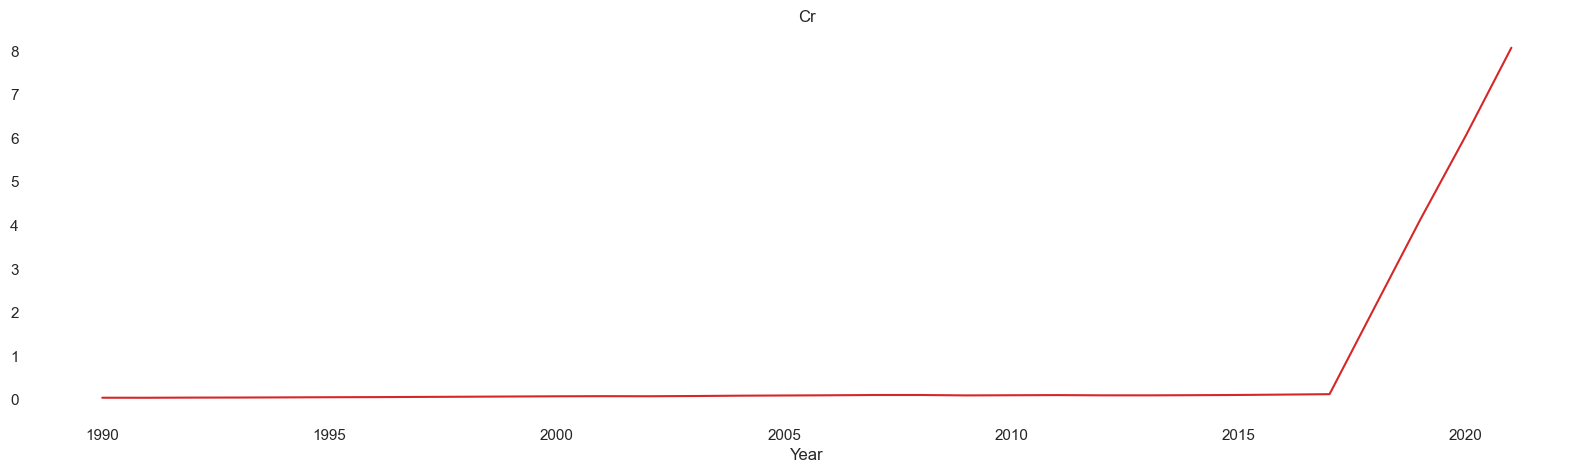

In [58]:
fig, ax = plt.subplots(figsize=(20,5))
plt.title('Cr') 
ax.set_facecolor('white')

color = 'tab:red'
ax.set_xlabel('Year')
ax.plot(df_emissionsPV['Year'], df_emissionsPV['Cr'],color) 

'''color = 'tab:blue'
ax1.plot(df_emissionsPV['Year'], df_emissionsPV['rolling_Cr'],color) '''

plt.grid()
plt.show() 

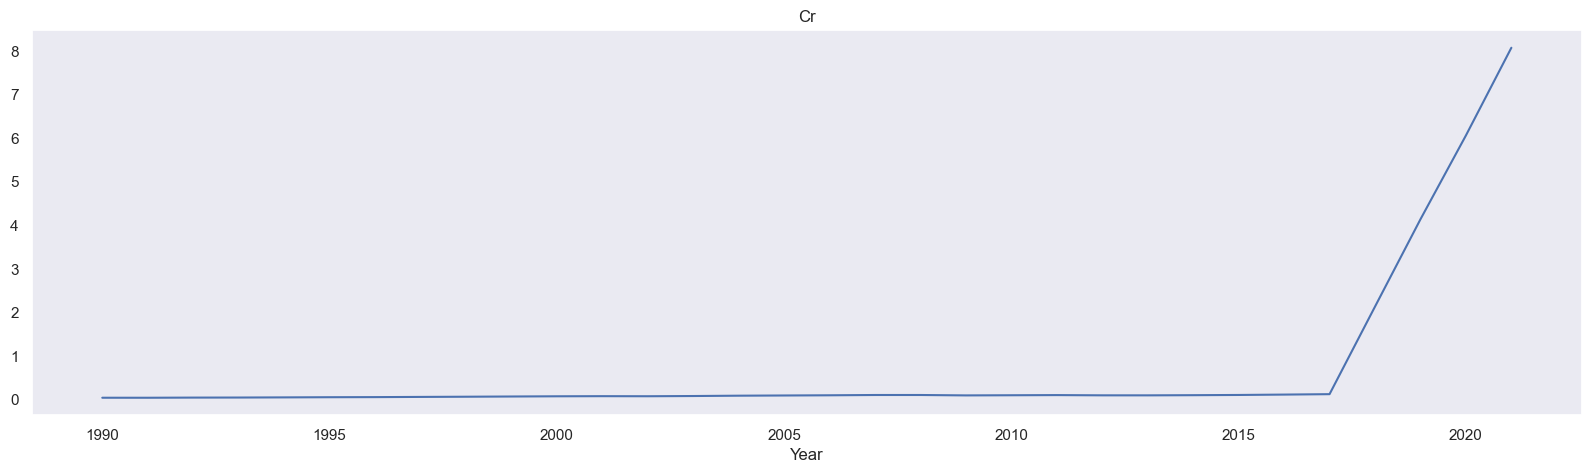

In [59]:
fig, ax1 = plt.subplots(figsize=(20,5))
plt.title('Cr') 

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.plot(df_emissionsPV['Year'], df_emissionsPV['Cr']) 


plt.grid()
plt.show() 

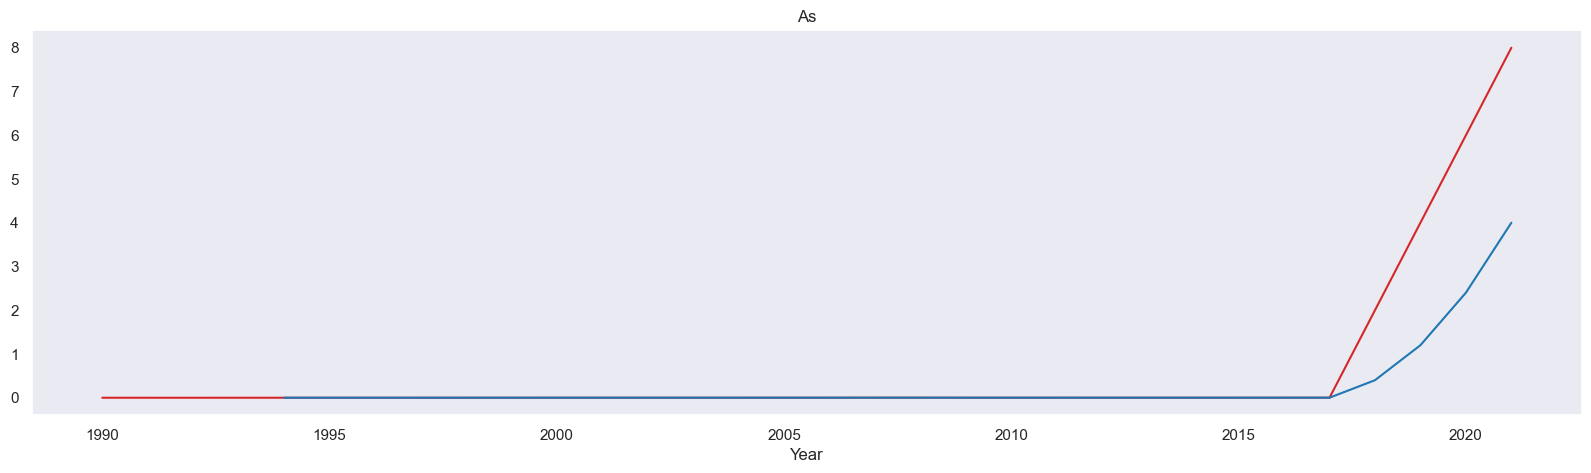

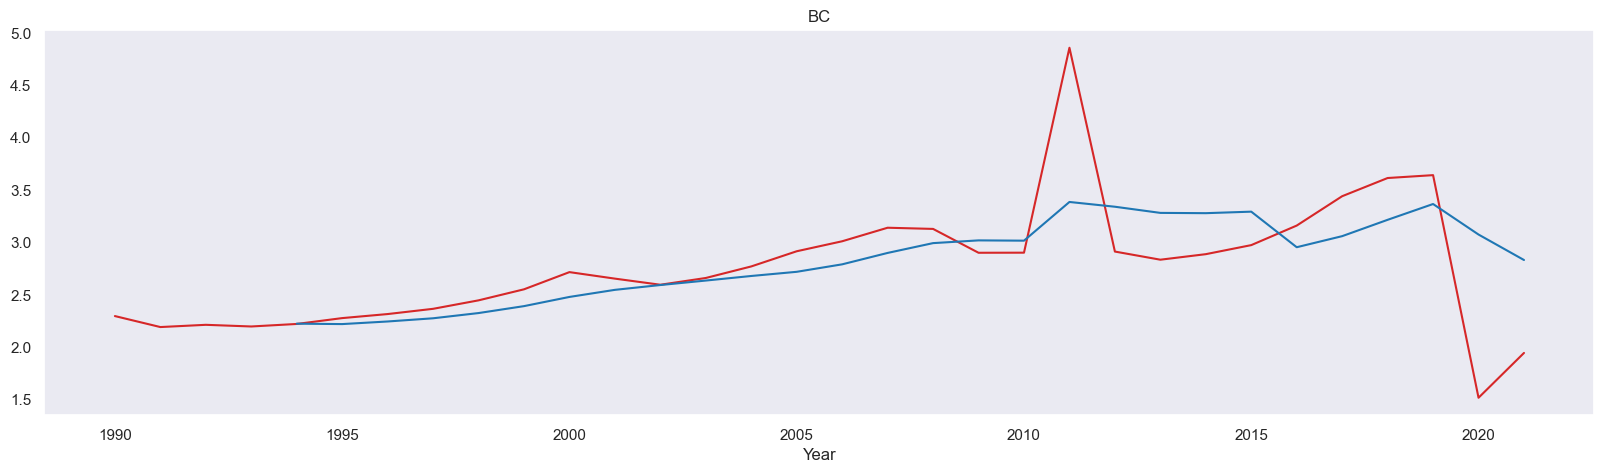

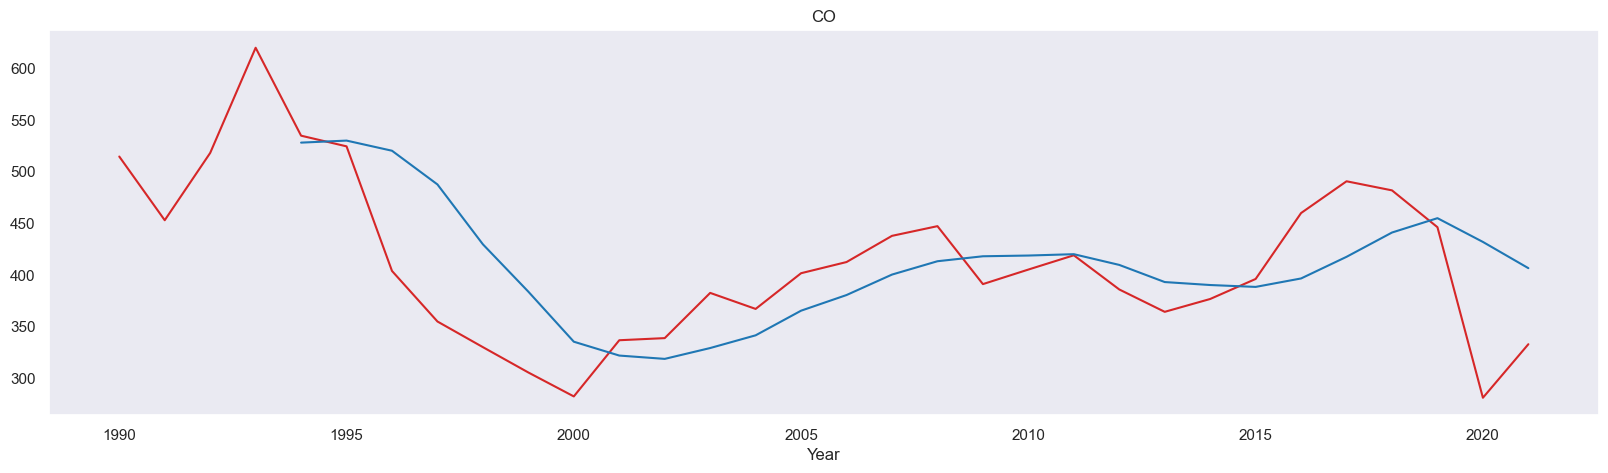

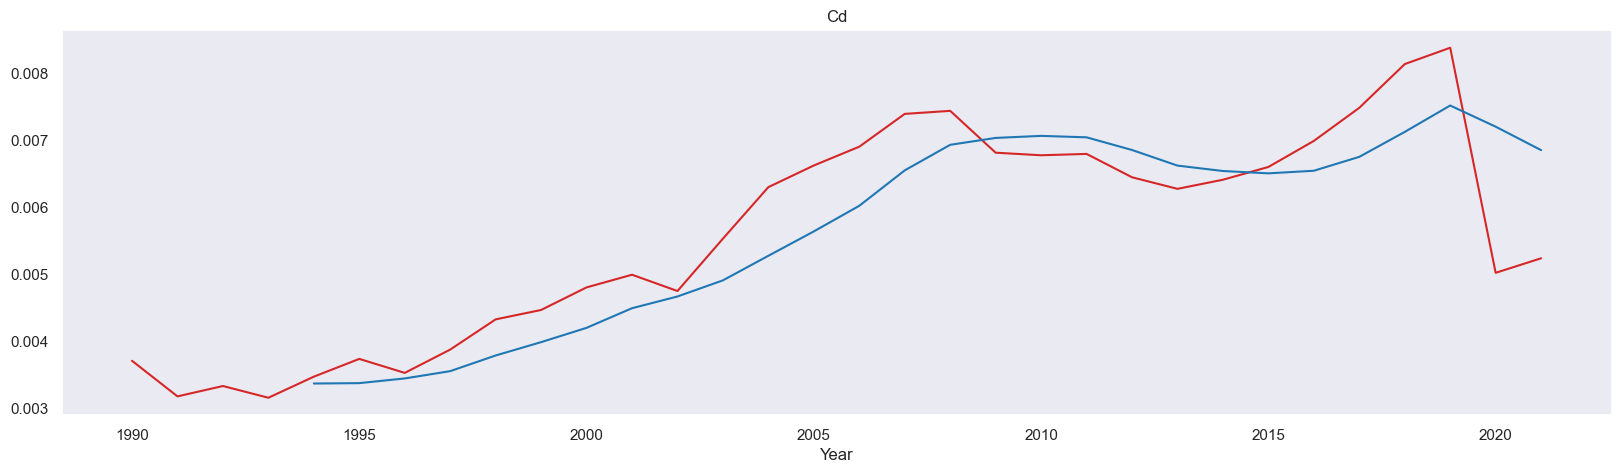

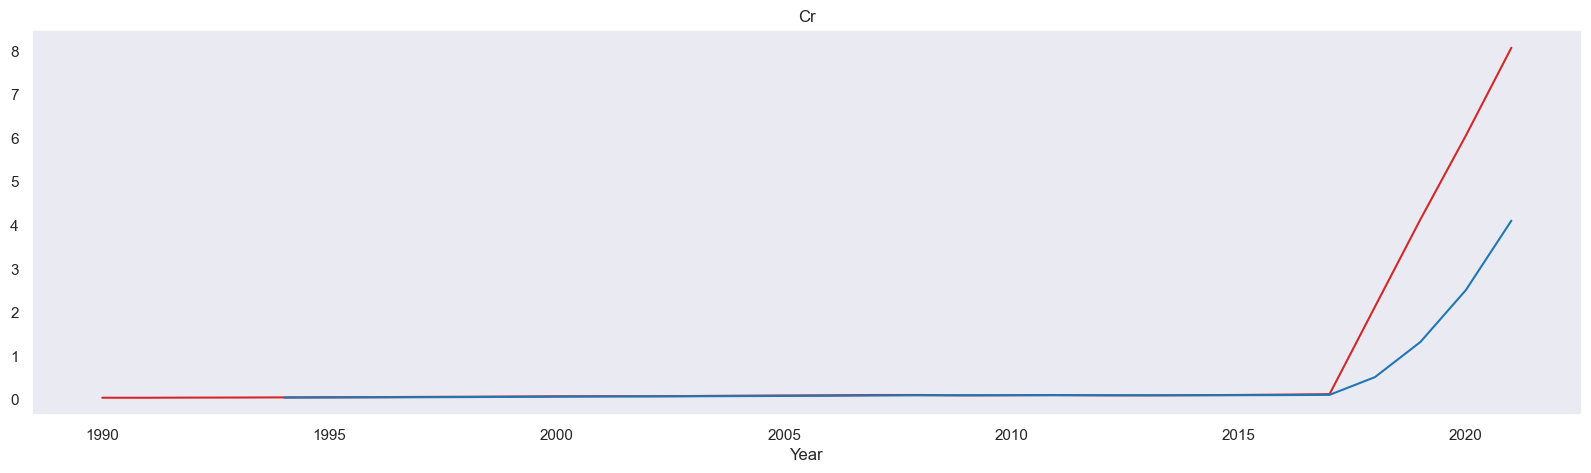

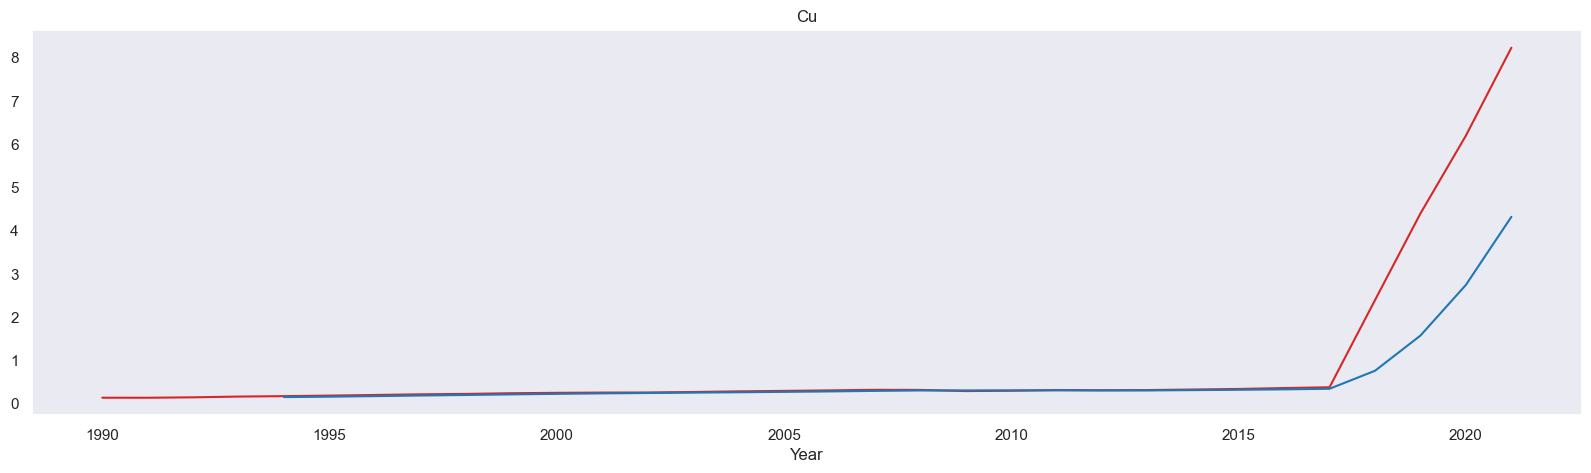

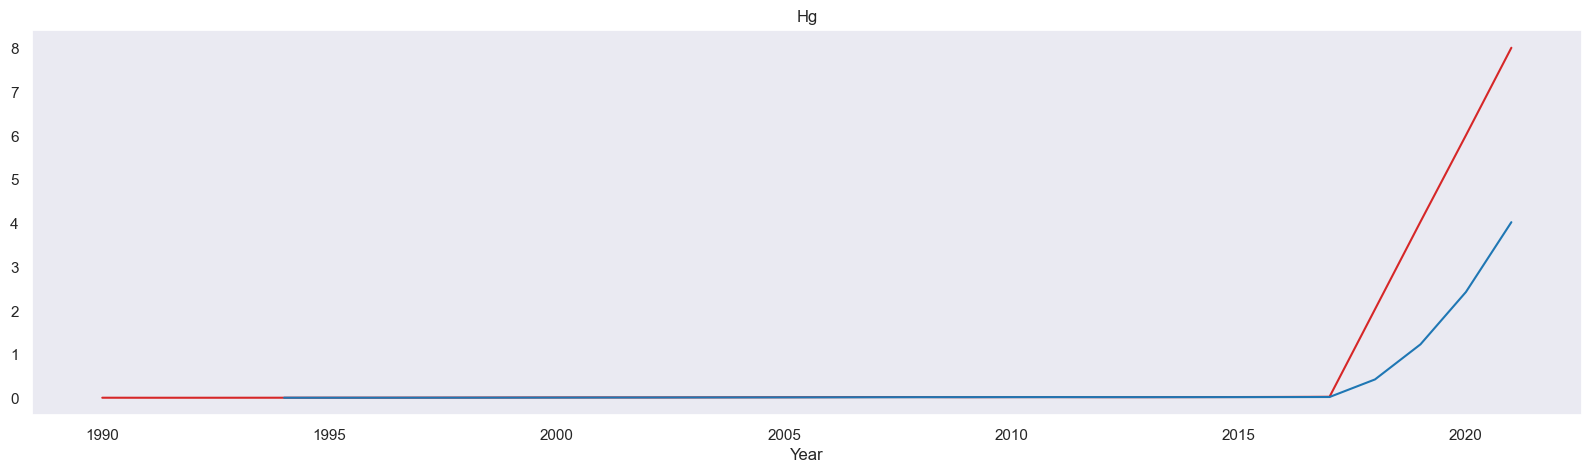

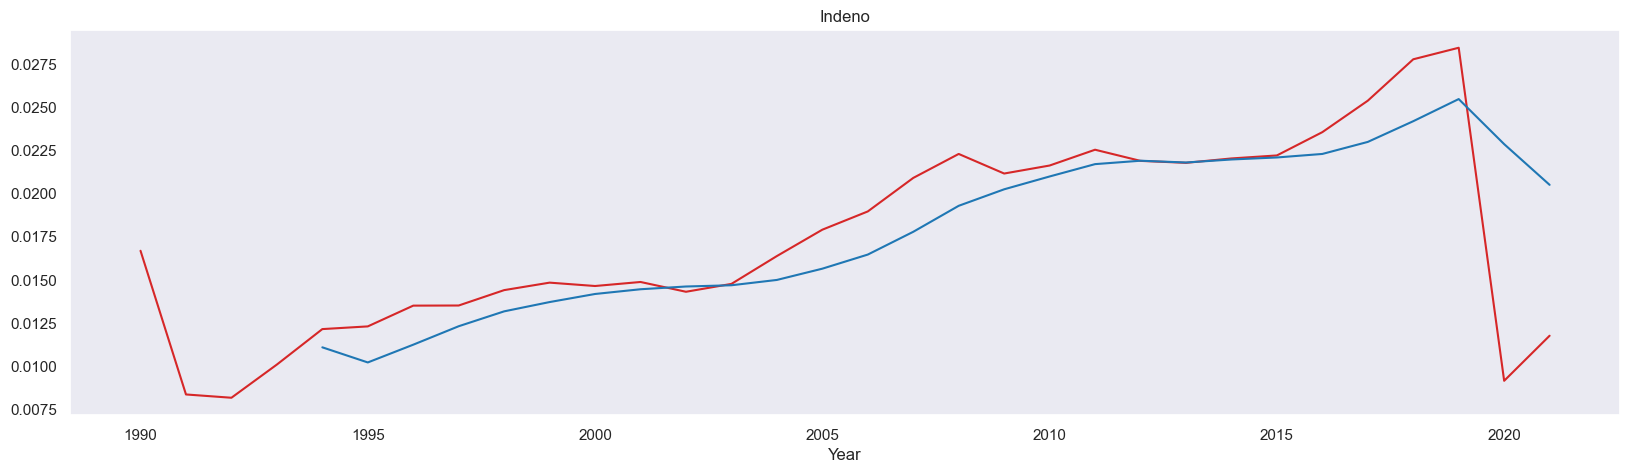

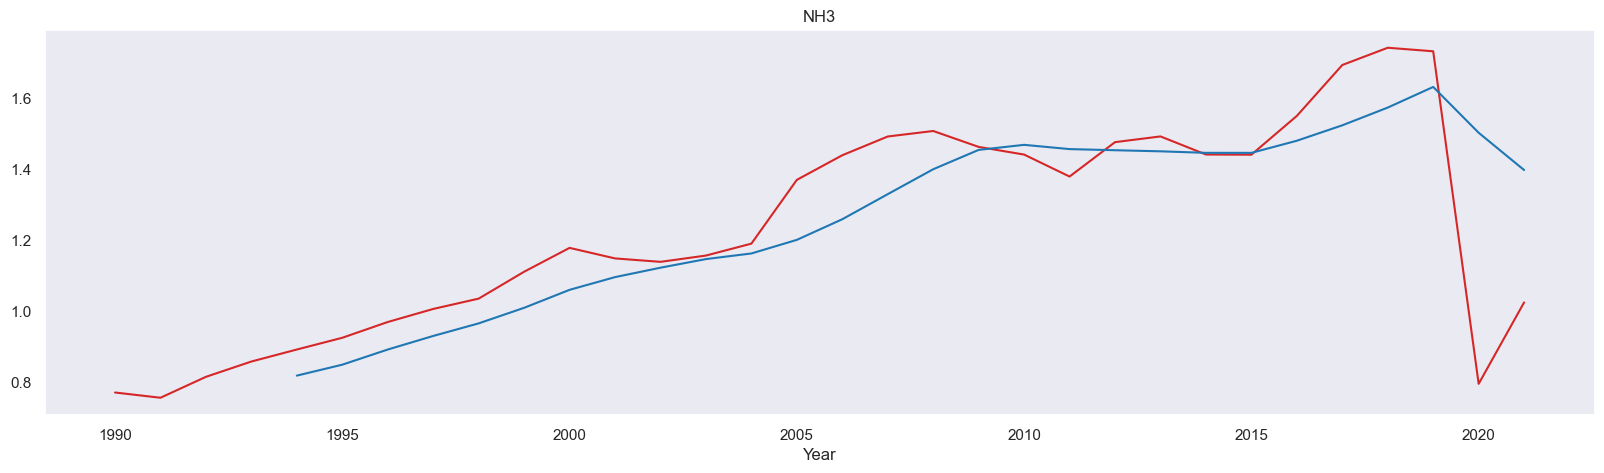

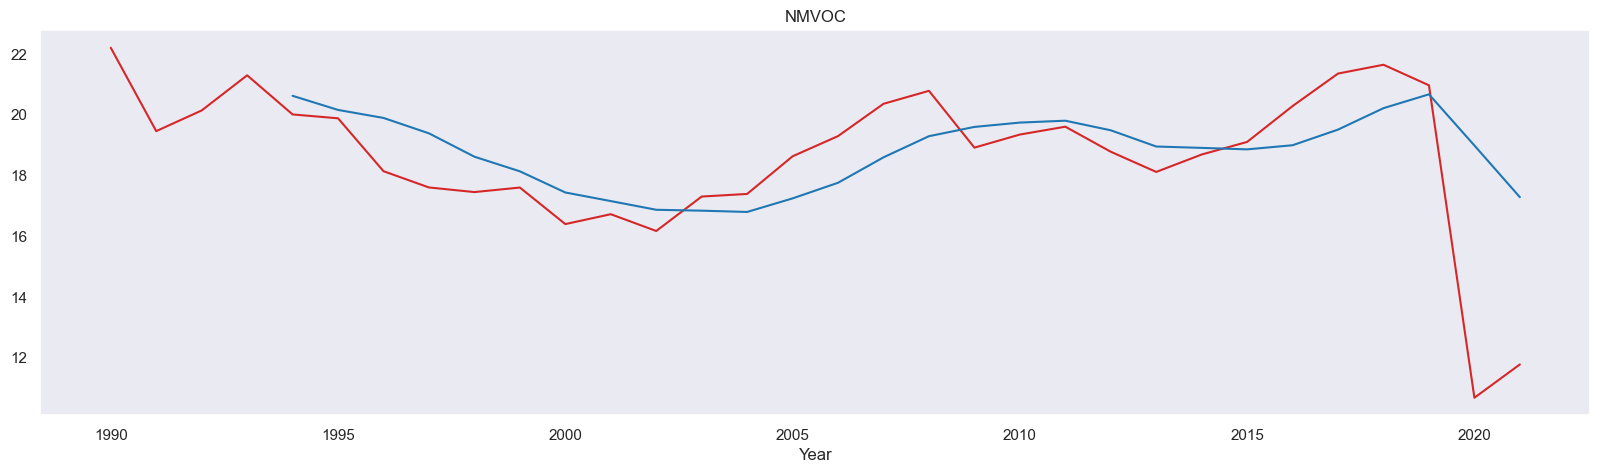

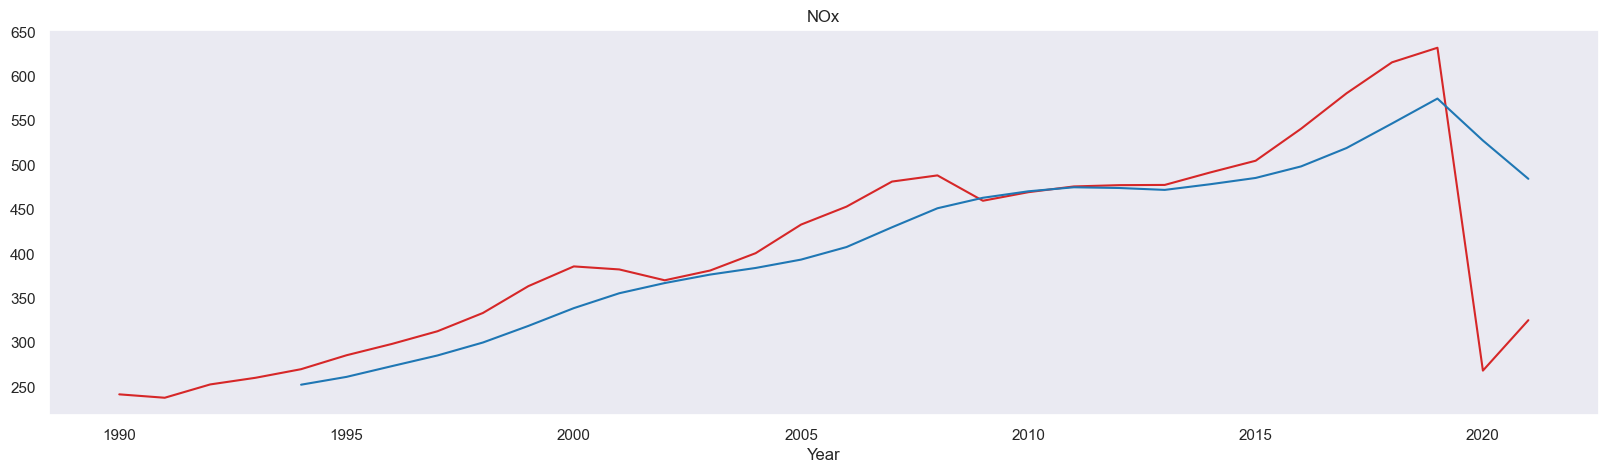

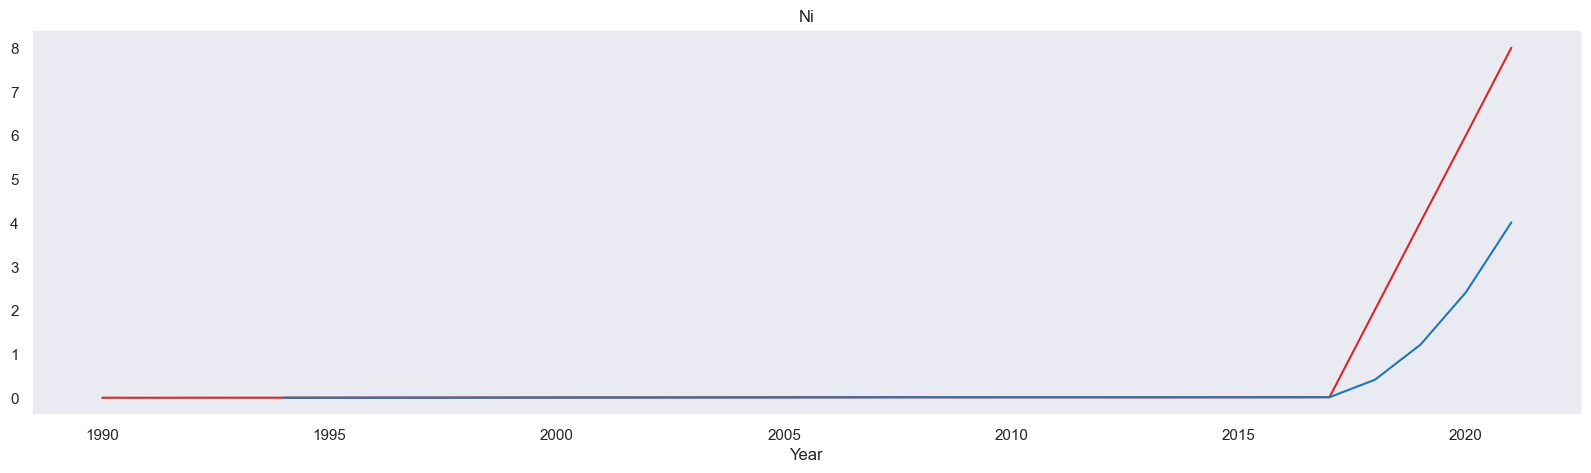

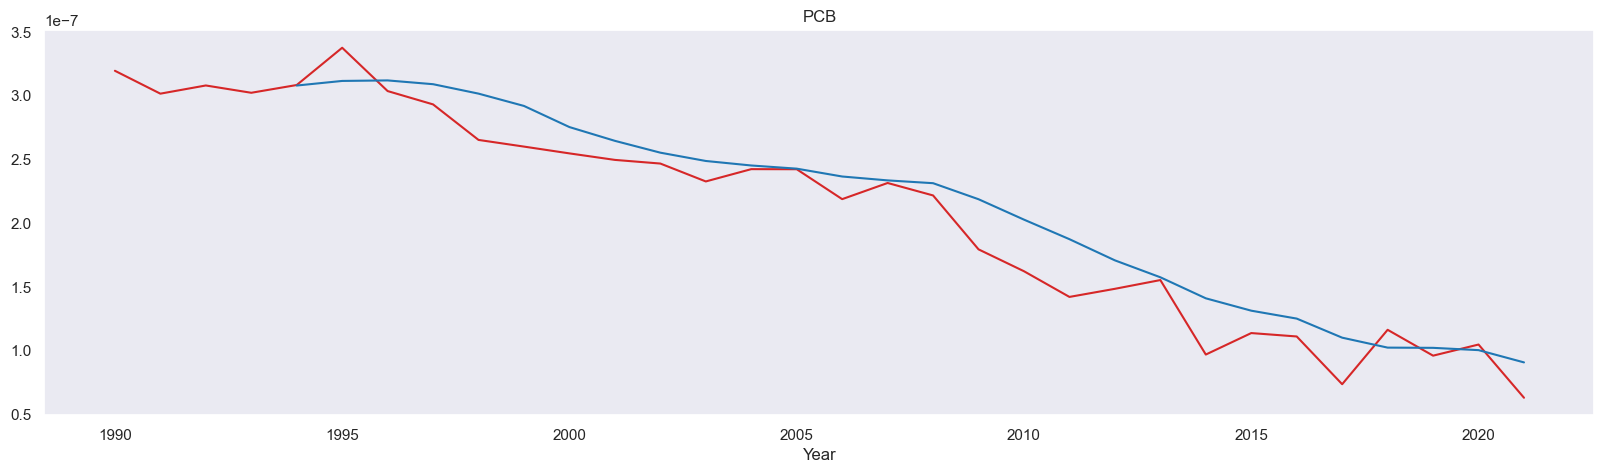

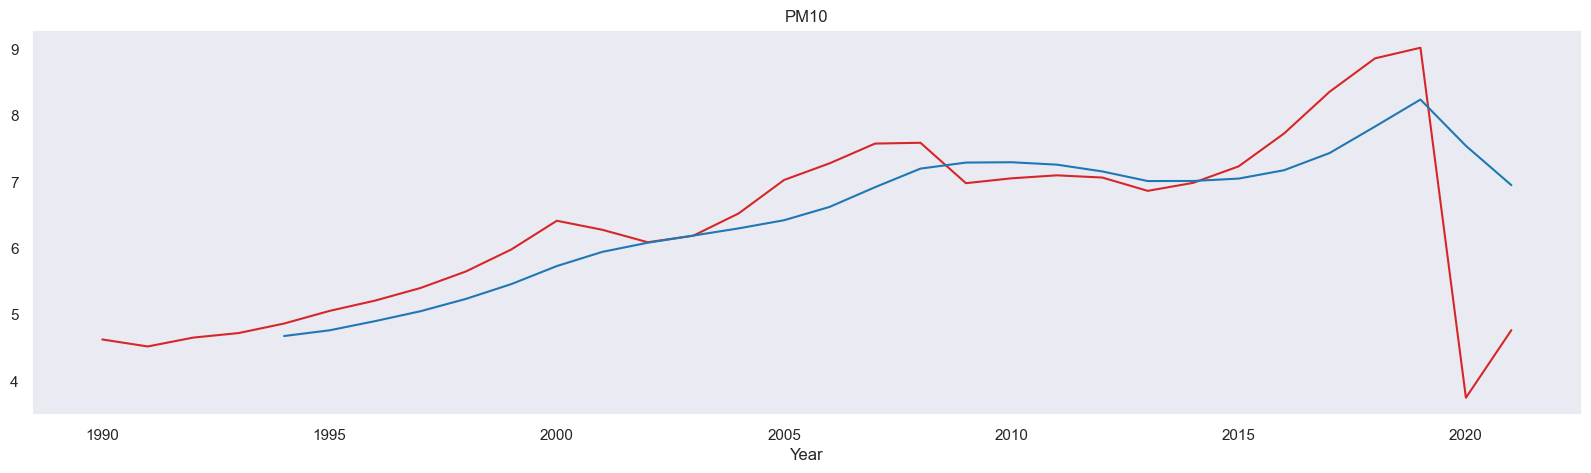

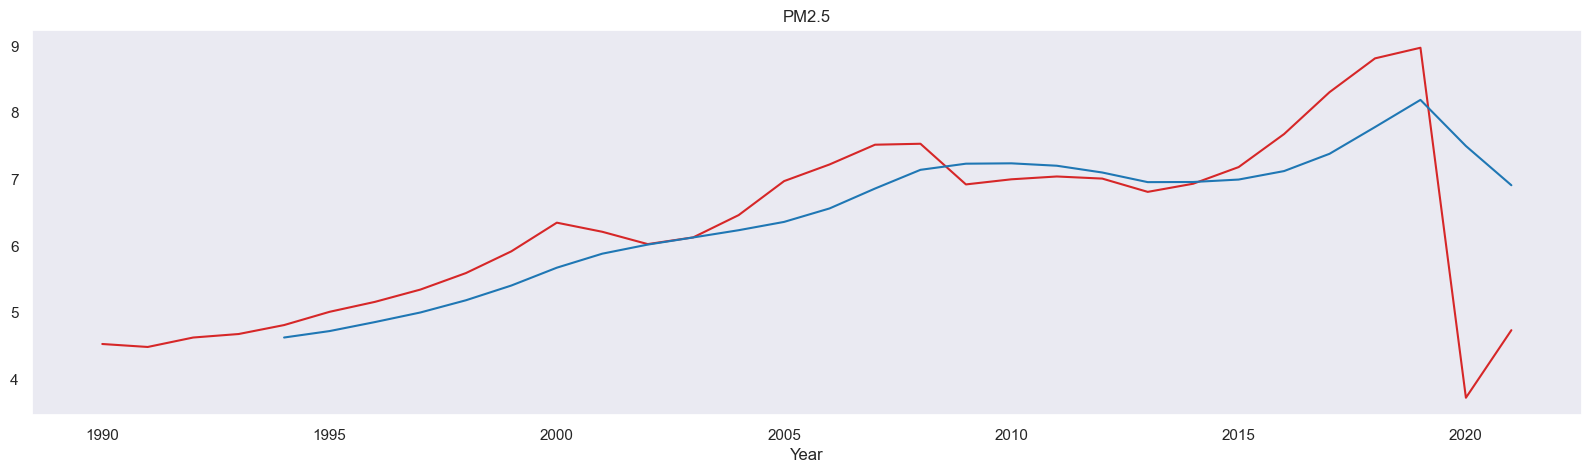

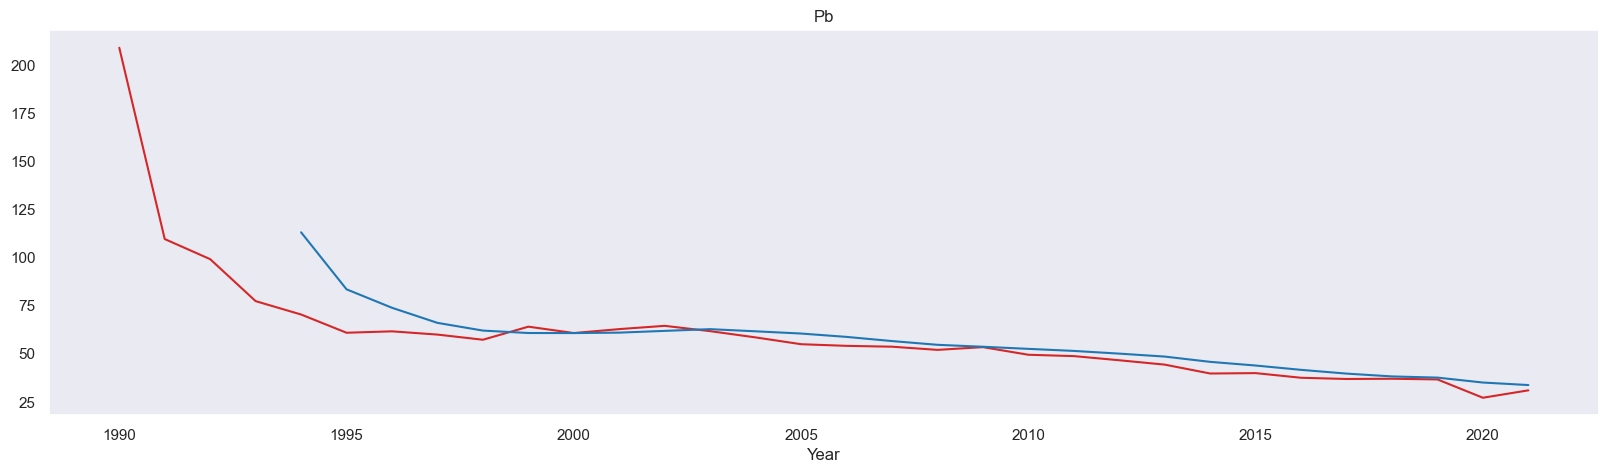

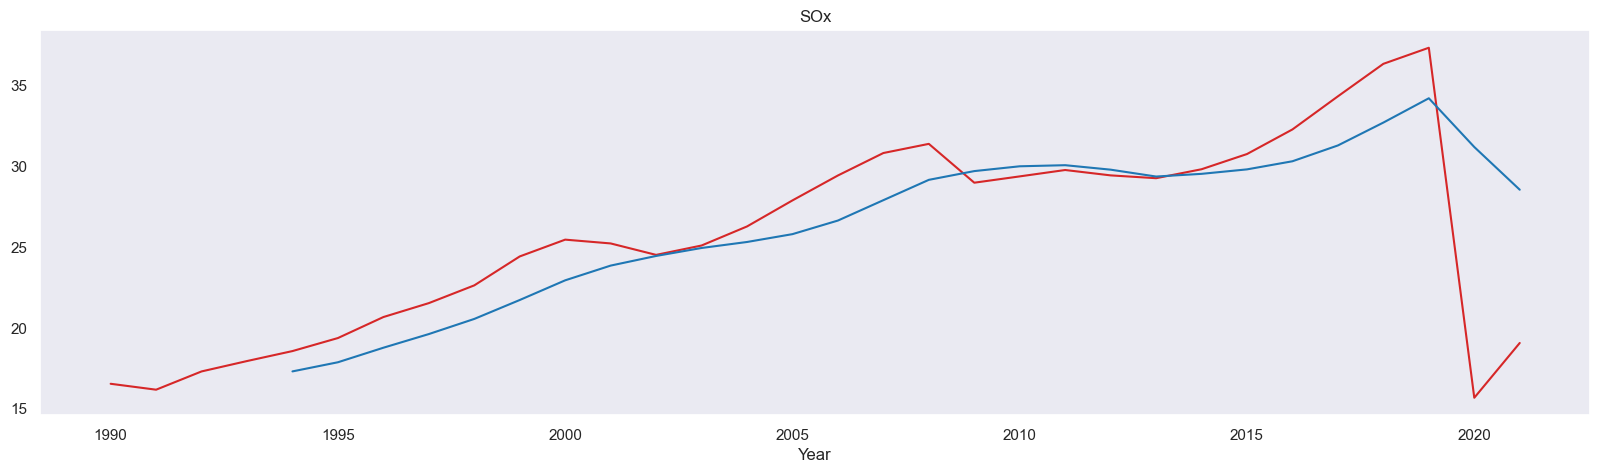

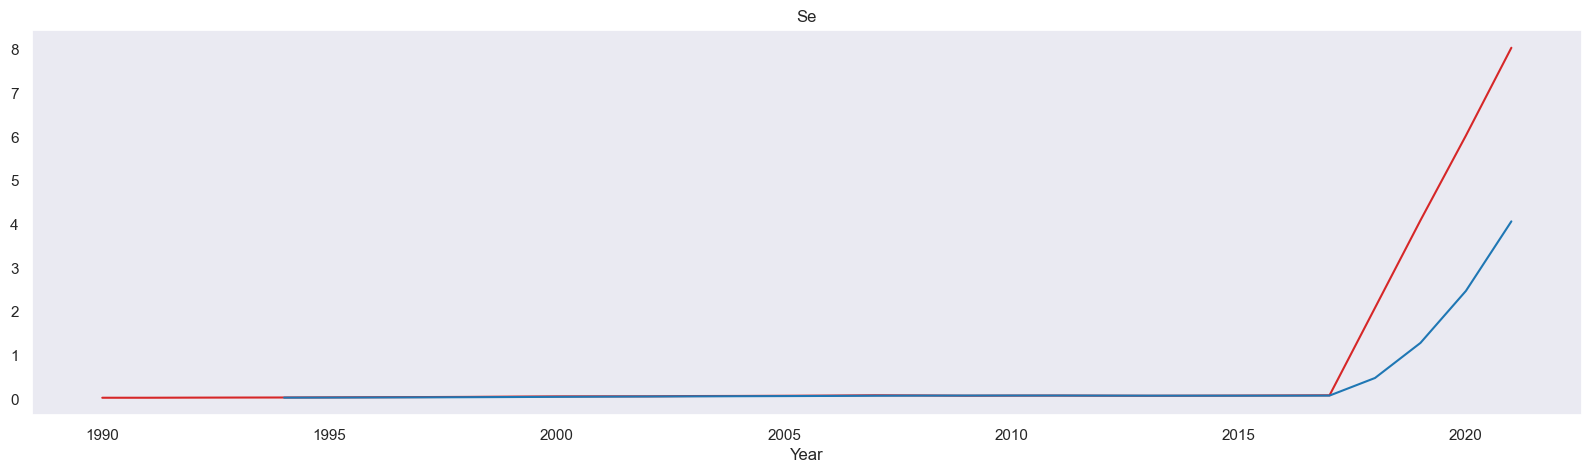

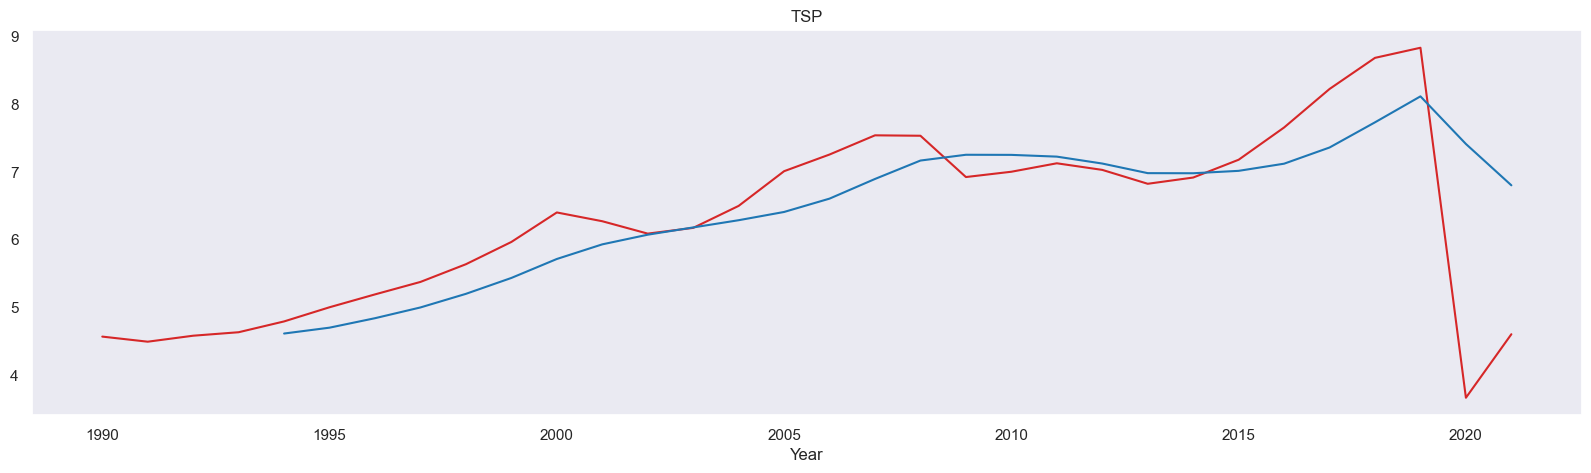

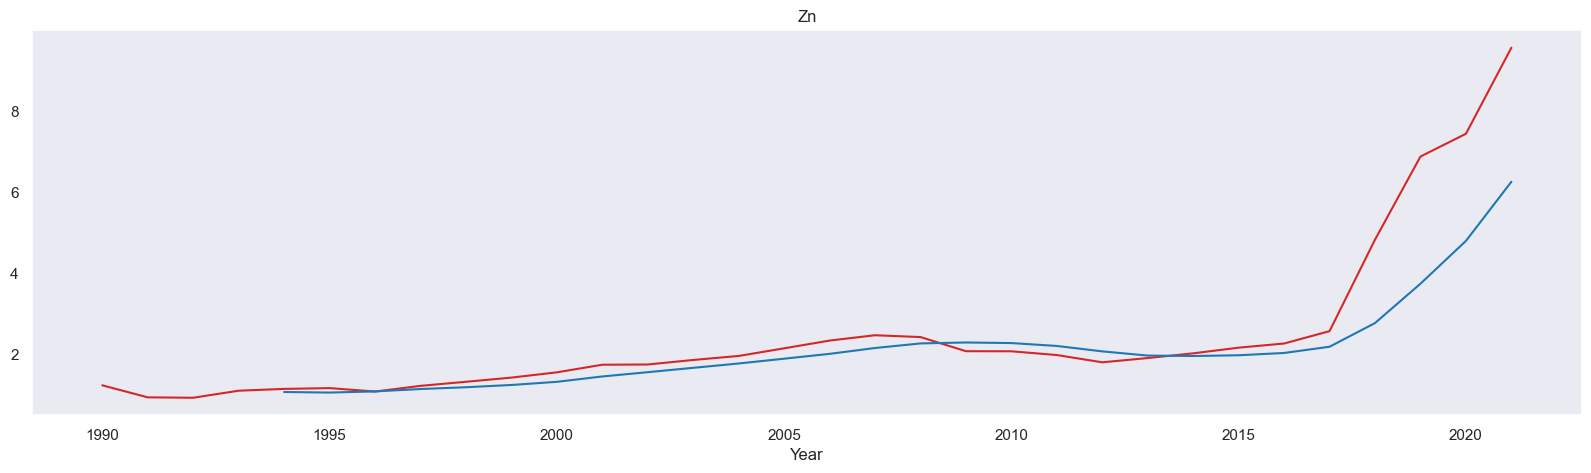

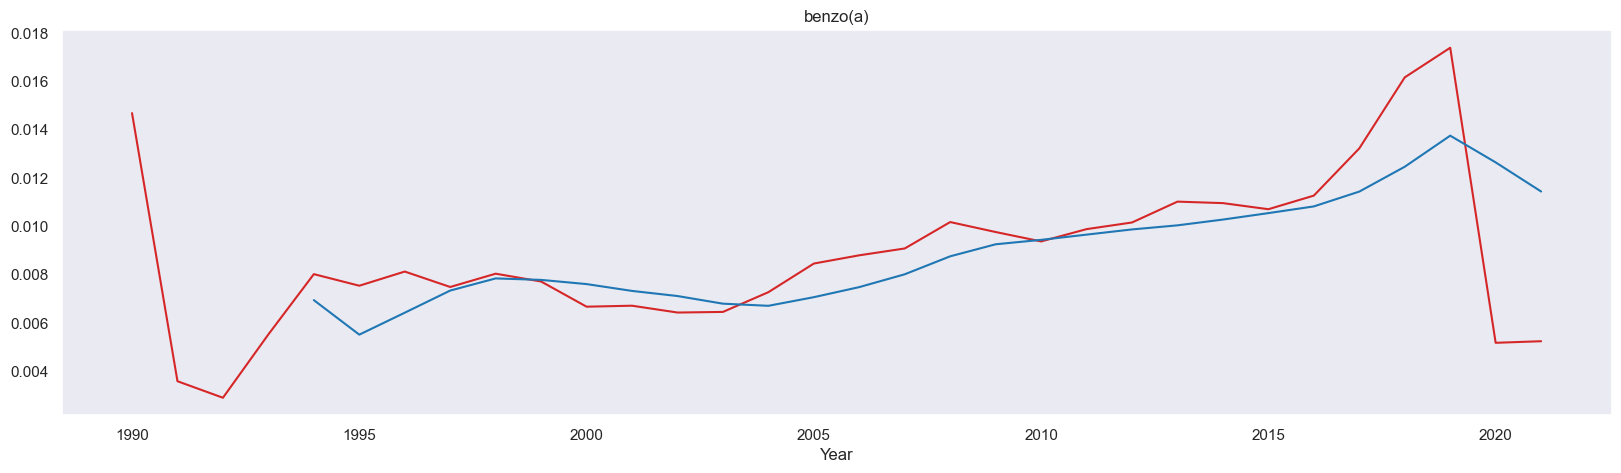

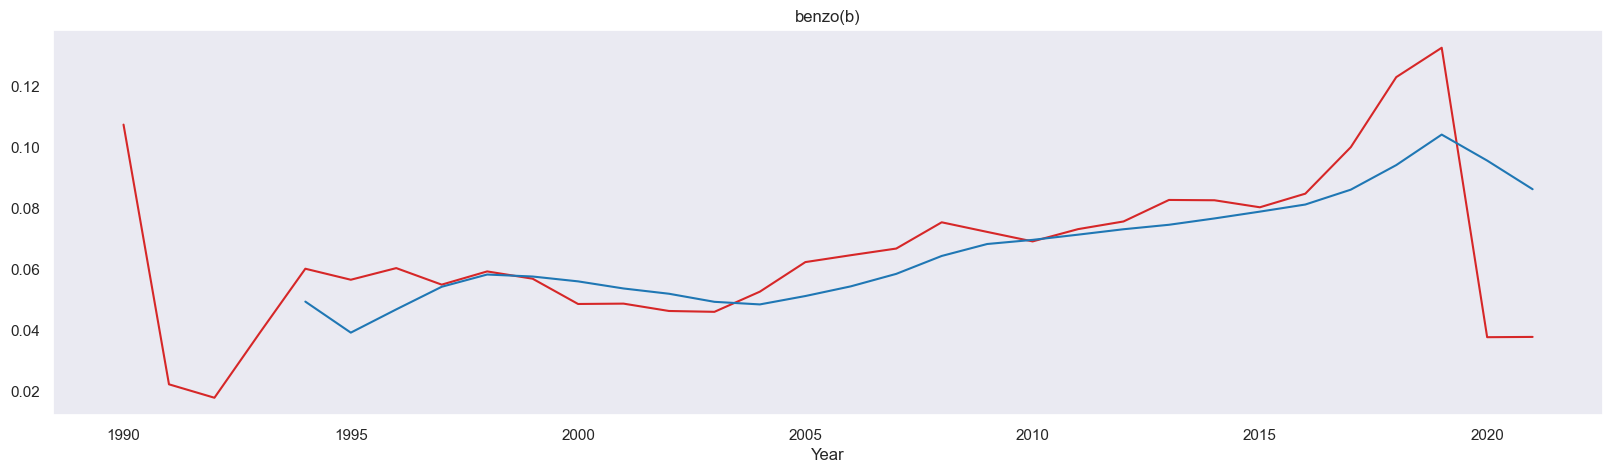

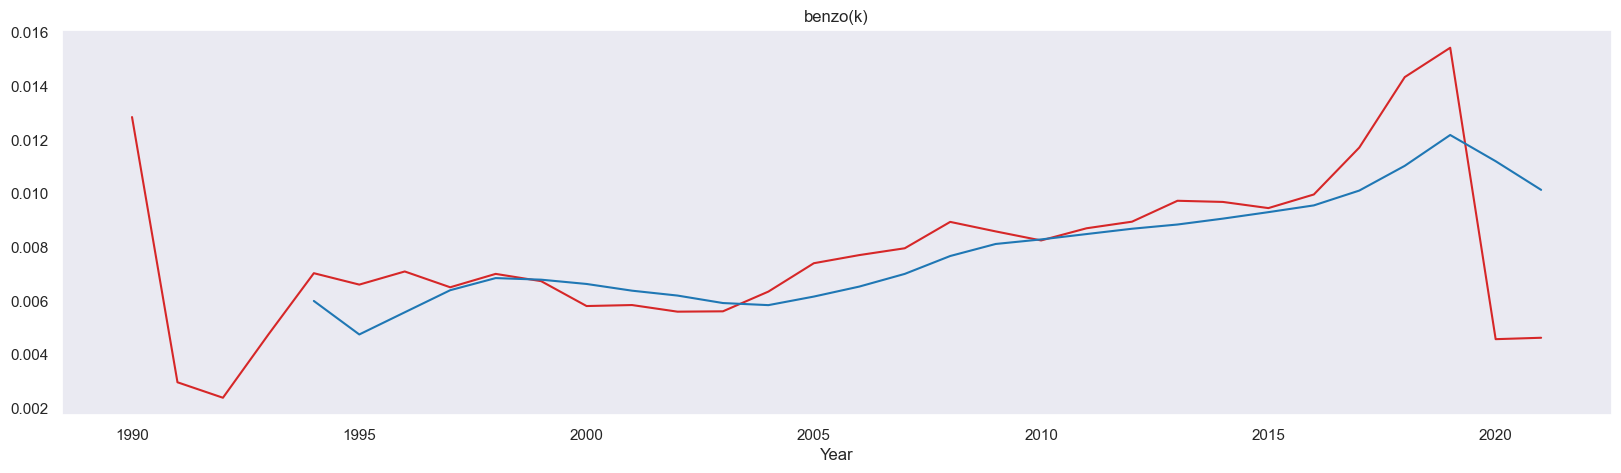

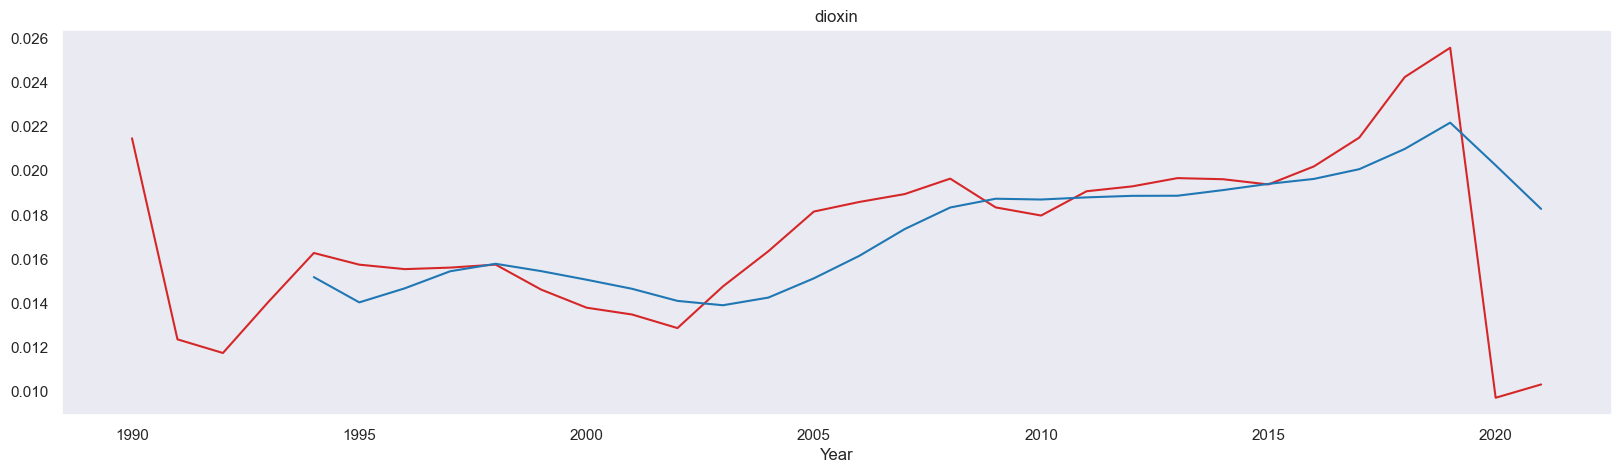

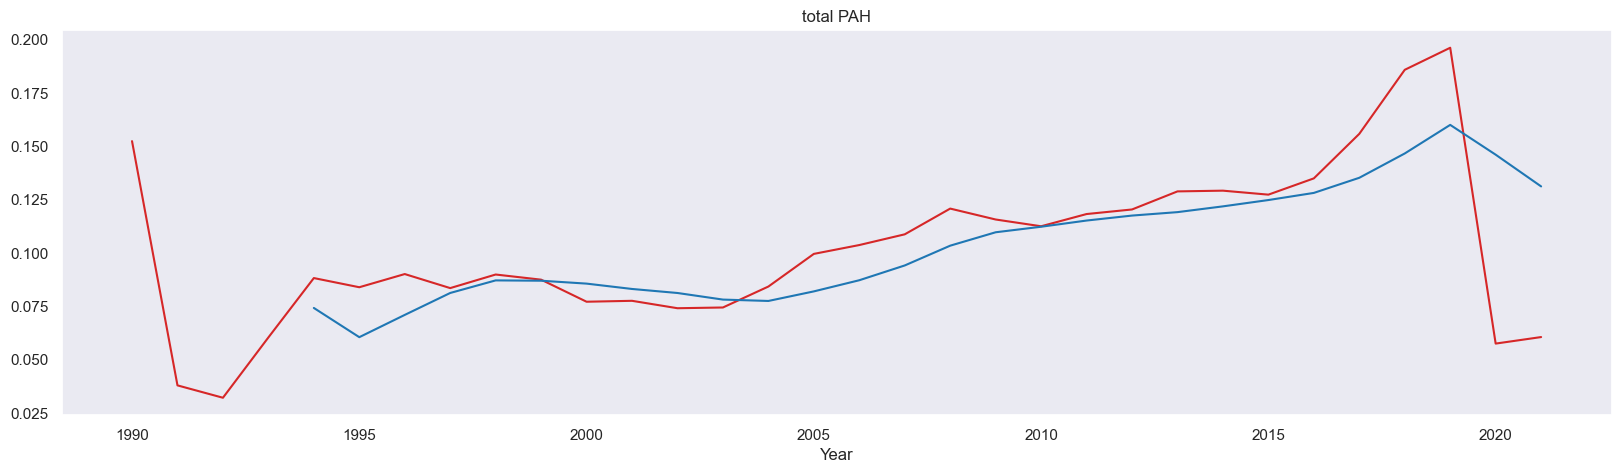

In [60]:
for x in pollutants:
    fig, ax1 = plt.subplots(figsize=(20,5))
    plt.title(x) 

    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.plot(df_emissionsPV['Year'], df_emissionsPV[x],color=color) 
    
    
    color = 'tab:blue'
    ax1.plot(df_emissionsPV['Year'], df_emissionsPV['rolling_'+x],color=color) 
    
    plt.grid()
    plt.show() 


# 7.3. Correlation between year and emissions

# 8. Export